In [1]:
# Importing Necessary Libaries 
import numpy as np
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import math
import matplotlib.pyplot as plt
import time
import pandas as pd
import scipy.interpolate
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Model training

In [2]:
tf.test.gpu_device_name()

2021-12-03 20:22:39.597385: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-03 20:22:42.444890: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 20:22:42.529180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 20:22:42.529993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

'/device:GPU:0'

# Unzip the data in CNN_data.zip before you run the following code

In [42]:
val_data=np.loadtxt("NN-p2p_data/val_data.csv",delimiter=",")
print(val_data.shape)
train_data=np.loadtxt("NN-p2p_data/train_data.csv",delimiter=",")
print(train_data.shape)
val_X=val_data[:,0:20]
val_y=val_data[:,20:]
train_X=train_data[:,0:20]
train_y=train_data[:,20:]

(1169387, 23)
(3516766, 23)


In [5]:
def fully_connected(input):

    lamda = 0    ###Regularization
    # define the hidden layer
    x = layers.Flatten()(input)
   
    x = layers.Dense(1000,bias_regularizer=tf.keras.regularizers.l2(lamda),kernel_regularizer=tf.keras.regularizers.l2(lamda), activation='relu')(x)
 
    x = layers.Dense(1000,bias_regularizer=tf.keras.regularizers.l2(lamda),kernel_regularizer=tf.keras.regularizers.l2(lamda), activation='relu')(x)

    x = layers.Dense(1000,bias_regularizer=tf.keras.regularizers.l2(lamda),kernel_regularizer=tf.keras.regularizers.l2(lamda), activation='relu')(x)

    x = layers.Dense(1000,bias_regularizer=tf.keras.regularizers.l2(lamda),kernel_regularizer=tf.keras.regularizers.l2(lamda), activation='relu')(x)

    x = layers.Dense(1000,bias_regularizer=tf.keras.regularizers.l2(lamda),kernel_regularizer=tf.keras.regularizers.l2(lamda), activation='relu')(x)

    x = layers.Dense(1000,bias_regularizer=tf.keras.regularizers.l2(lamda),kernel_regularizer=tf.keras.regularizers.l2(lamda), activation='relu')(x)

    x = layers.Dense(1000,bias_regularizer=tf.keras.regularizers.l2(lamda),kernel_regularizer=tf.keras.regularizers.l2(lamda), activation='relu')(x)

    x = layers.Dense(1000,bias_regularizer=tf.keras.regularizers.l2(lamda),kernel_regularizer=tf.keras.regularizers.l2(lamda), activation='relu')(x)

    x = layers.Dense(1000,bias_regularizer=tf.keras.regularizers.l2(lamda),kernel_regularizer=tf.keras.regularizers.l2(lamda), activation='relu')(x)

    x = layers.Dense(1000,bias_regularizer=tf.keras.regularizers.l2(lamda),kernel_regularizer=tf.keras.regularizers.l2(lamda), activation='relu')(x)

    

    output = layers.Dense(3, activation='linear')(x)

    
    return output




In [6]:

# Define Inputs and Outputs
inputs_x = layers.Input(shape=(20,))

output = fully_connected(inputs_x)
# Use Keras Functional API to Create our Model and Define our Optimizer and Loss Function
fc_model = tf.keras.Model(inputs =inputs_x, outputs=output)
fc_model.compile(tf.keras.optimizers.Adam(0.0001), loss=tf.keras.losses.MeanSquaredError(),run_eagerly=True)

fc_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
flatten (Flatten)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 1000)              21000     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              100100

2021-12-03 20:26:17.630781: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 20:26:17.631640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 20:26:17.632393: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 20:26:17.633396: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 20:26:17.634165: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [7]:
reduce_lr =tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, min_lr=0.00001)


In [8]:
import os
checkpoint_filepath = 'nn-p2p-checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(checkpoint_filepath,
                                      '%s-{epoch:02d}.hdf5' % "points_interp"),
    save_best_only=True,
    save_weights_only=False,
    monitor='val_loss',
    save_freq="epoch",
    mode='min',
    verbose=1,
)

In [11]:
history = fc_model.fit(train_X,train_y,batch_size=2048, validation_data=(val_X, val_y), epochs=200,shuffle = True,callbacks=[reduce_lr,model_checkpoint_callback],use_multiprocessing=True,workers=4)



1718/1718 [==============================] - 161s 94ms/step - loss: 0.0632 - val_loss: 0.0375

Epoch 00001: val_loss improved from inf to 0.03749, saving model to nn-p2p-checkpoints/points_interp-01.hdf5


## Model prediction 

In [43]:
model_file = "Trained_model/trained_nn_p2p.hdf5"
fc_model = tf.keras.models.load_model(model_file)
fc_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              21000     
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1001

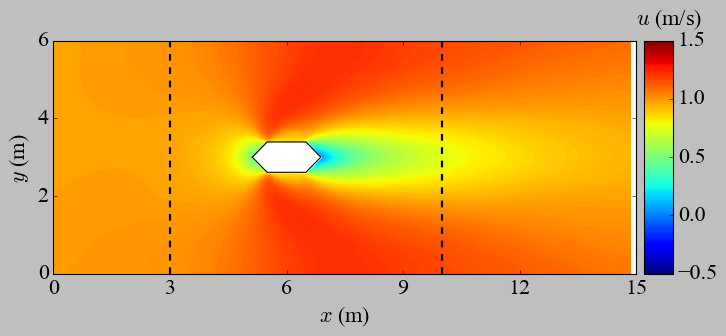

In [40]:

plt.style.use("classic")
#matplotlib.font_manager._rebuild()
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Times New Roman'
axis_font = {'fontname':'Times New Roman', 'size':'14'}



test_data=np.loadtxt("triangular_pier_prediction_data/test_whole_domain.csv",delimiter=",")
test_X=test_data[:,0:20]
test_y=test_data[:,20:]


#### Boundary coordinates for visualization

boundary= np.genfromtxt("triangular_pier_prediction_data/boundary_data.csv",  delimiter=',', skip_header = 1)
boundary_new = np.append(boundary,boundary[0,:])
boundary_new=boundary_new.reshape(len(boundary)+1,2)
boundary_plot_line=np.ones(boundary_new[:,1].shape)*3


###x_ y_ are the point cooridinates. 
###They are normalized as the input data of the training. Here de-normalized them to the original value for plot.
x_=test_X[:,0]*7+3
y_=test_X[:,1]*6

u_=test_y[:,0]

v_=test_y[:,1]

h_=test_y[:,2]


vxy_hat_arrays = fc_model.predict_on_batch(test_X)

### The outputs was normalized in the training. Here de-normalized the prediction.
vxy_hat_arrays[:,0]=vxy_hat_arrays[:,0]*0.26+0.94
vxy_hat_arrays[:,1]=vxy_hat_arrays[:,1]*0.14
vxy_hat_arrays[:,2]=vxy_hat_arrays[:,2]*0.027+2

u_field = np.zeros(len(x_))
v_field = np.zeros(len(x_))
h_field = np.zeros(len(x_))

u_field=vxy_hat_arrays[:,0]   
v_field=vxy_hat_arrays[:,1]
h_field=vxy_hat_arrays[:,2]

vxy=np.zeros(vxy_hat_arrays.shape)
vxy[:,0]=u_
vxy[:,1]=v_
vxy[:,2]=h_






fig = plt.figure(figsize = (10,6))    

xi_num = np.linspace(0, 15, 101)
yi_num = np.linspace(0, 6, 51)




ui_pre = scipy.interpolate.griddata((x_, y_), u_field, (xi_num[None,:], yi_num[:,None]), method='linear')
ui_num = scipy.interpolate.griddata((x_, y_), u_, (xi_num[None,:], yi_num[:,None]), method='linear')

cf=plt.contourf(xi_num,yi_num,ui_pre,100, cmap=cm.jet,levels=np.arange(-0.5,1.51,0.01))
plt.plot(boundary_new[:,0],boundary_new[:,1],'-k',mfc = 'white')


plt.xlabel(r"$x$ (m)")
plt.ylabel(r"$y$ (m)")
plt.gca().set_aspect('equal', adjustable='box')
plt.text(15,6.4, r'$u$ (m/s)', fontsize=20,color='k',zorder=2)

ax = plt.gca()
ax.fill_between(boundary_new[:,0],boundary_new[:,1],boundary_plot_line,edgecolor='white',facecolor='white')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)   
cbar=fig.colorbar(cf,cax=cax,ticks=np.arange(-0.5,1.51,0.5))
ax.set_xticks(np.arange(0, 15.01, step=3))
ax.set_yticks(np.arange(0, 6.01, step=2))
ax.axvline(x=3,c="k",lw=2,ls='--')
ax.axvline(x=10,c="k",lw=2,ls='--')


